In [12]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp

def ot_in_cartesian(x_val, y_val, z_val):
    # Define symbolic variables
    x, y, z = sp.symbols('x y z')

    # Express r and theta in terms of x, y, z
    r = sp.sqrt(x**2 + y**2)
    theta = sp.atan2(y, x)

    # Calculate the derivatives of theta with respect to x and y
    dtheta_dx = sp.diff(theta, x)
    dtheta_dy = sp.diff(theta, y)

    # Original form in cylindrical coordinates
    form = sp.cos(r)*sp.diff(z) + r*sp.sin(r)*dtheta_dx*sp.diff(x) + r*sp.sin(r)*dtheta_dy*sp.diff(y)

    # Substitute the values of x, y, z and evaluate the form
    form_evaluated = form.subs({x: x_val, y: y_val, z: z_val}).doit()

    # Extract and evaluate coefficients for dx, dy, dz
    a = form_evaluated.coeff(sp.diff(x)).evalf()
    b = form_evaluated.coeff(sp.diff(y)).evalf()
    c = form_evaluated.coeff(sp.diff(z)).evalf()

    return [a, b, c]

def get_basis(matrix, x_val, y_val, z_val):
    # Define symbolic variables x, y, z
    x, y, z = sp.symbols('x y z')

    # Convert the matrix elements to SymPy expressions
    matrix_sympy = [sp.sympify(element) for element in matrix]

    # For a matrix [a, b, c], the kernel is solved by ax + by + cz = 0
    a, b, c = matrix_sympy

    # Constructing the basis vectors
    basis1 = np.array([1, 0, -a/c], dtype=object) if c != 0 else np.array([1, 0, 0], dtype=object)
    basis2 = np.array([0, 1, -b/c], dtype=object) if c != 0 else np.array([0, 1, 0], dtype=object)

    # Function to substitute values into a symbolic expression or return the value if it's not symbolic
    def substitute_if_symbolic(expr, substitutions):
        return expr.subs(substitutions) if isinstance(expr, sp.Expr) else expr

    # Substituting the values of x, y, z
    substitutions = {x: x_val, y: y_val, z: z_val}
    basis1_evaluated = np.array([substitute_if_symbolic(el, substitutions) for el in basis1], dtype=float)
    basis2_evaluated = np.array([substitute_if_symbolic(el, substitutions) for el in basis2], dtype=float)

    return basis1_evaluated, basis2_evaluated


def plot_plane(ax, x, y, z, form, size=0.1, height_limit=0.2, surfcolor='blue', alpha=0.5):
    """
    Plots a small plane at the point (x, y, z) in the directions (1, 0, -x) and (0, 1, 0).
    The rendering of the plane is limited to a small cube around (x, y, z), including vertically.
    """
    v1, v2 = get_basis(form, x, y, z)

    # Create a grid on the plane
    u, v = np.meshgrid(np.linspace(-size, size, 10), np.linspace(-size, size, 10))
    plane_x = x + u * v1[0] + v * v2[0]
    plane_y = y + u * v1[1] + v * v2[1]
    plane_z = z + u * v1[2] + v * v2[2]

    # Clamping the z-values to be within the height_limit
    plane_z = np.clip(plane_z, z - height_limit/2, z + height_limit/2)

    # Plot the plane
    ax.plot_surface(plane_x, plane_y, plane_z, color=surfcolor, alpha=alpha)


In [13]:
def knot1(ax, form, n):
    # Define the parametric equations for the knot
      t = np.linspace(0, 2*np.pi, 200)
      x = 3 * np.sin(t) * np.cos(t)
      y = np.cos(t)
      z = np.sin(t)**3

      ax.plot(x, y, z, color='b')

      # Take n equidistant points from t
      t = np.linspace(0, 2 * np.pi, n)
      x = 3 * np.sin(t) * np.cos(t)
      y = np.cos(t)
      z = np.sin(t)**3

      # Call plot_plane for these points
      for xi, yi, zi in zip(x, y, z):
          plot_plane(ax, xi, yi, zi, form, surfcolor='red')


def knot2(ax, form, n):
    # Define the parametric equations for the knot
      t = np.linspace(0, 2*np.pi, 200)
      x = np.cos(t)
      y = np.sin(2*t)
      z = 2/3 * np.sin(t)*np.cos(2*t) -4/3 * np.sin(2*t)*np.cos(t)

      ax.plot(x, y, z, color='b')

      # Take n equidistant points from t
      t = np.linspace(0, 2 * np.pi, n)
      x = np.cos(t)
      y = np.sin(2*t)
      z = 2/3 * np.sin(t)*np.cos(2*t) -4/3 * np.sin(2*t)*np.cos(t)

      # Call plot_plane for these points
      for xi, yi, zi in zip(x, y, z):
          plot_plane(ax, xi, yi, zi, form, surfcolor='red')


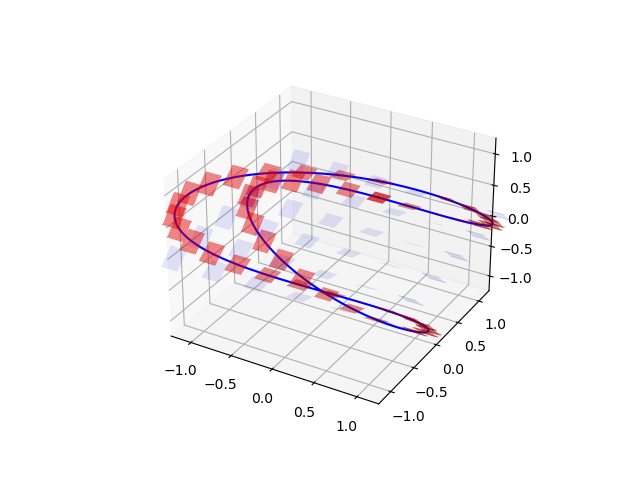

In [14]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

form = [0, 'x', 1]

# Generate a grid in the xy plane
grid_size = 1.2
step = 0.5
for x in np.arange(-grid_size, grid_size + step, step):
    for y in np.arange(-grid_size, grid_size + step, step):
        plot_plane(ax, x, y, 0, form, alpha=0.1)

knot1(ax, form, 50)

# Set plot limits
ax.set_xlim([-grid_size, grid_size])
ax.set_ylim([-grid_size, grid_size])
ax.set_zlim([-grid_size, grid_size])

# Show the plot
plt.show()

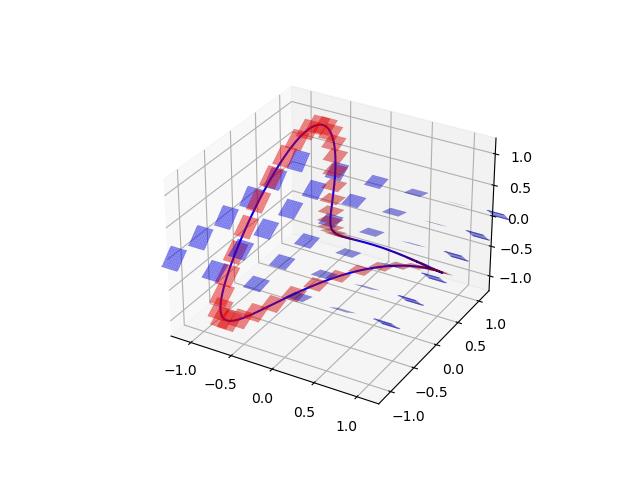

In [15]:

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate a grid in the xy plane
grid_size = 1.2
step = 0.5
for x in np.arange(-grid_size, grid_size + step, step):
    for y in np.arange(-grid_size, grid_size + step, step):
        plot_plane(ax, x, y, 0, form, alpha=0.5)

knot2(ax, form, 50)

# Set plot limits
ax.set_xlim([-grid_size, grid_size])
ax.set_ylim([-grid_size, grid_size])
ax.set_zlim([-grid_size, grid_size])

# Show the plot
plt.show()


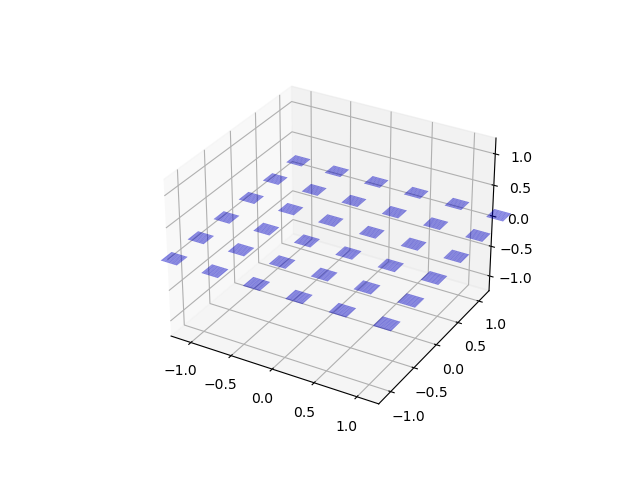

In [16]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Generate a grid in the xy plane
grid_size = 1.2
step = 0.5
for x in np.arange(-grid_size, grid_size + step, step):
    for y in np.arange(-grid_size, grid_size + step, step):
        plot_plane(ax, x, y, 0, ot_in_cartesian(x,y,0), alpha=0.5)


# Set plot limits
ax.set_xlim([-grid_size, grid_size])
ax.set_ylim([-grid_size, grid_size])
ax.set_zlim([-grid_size, grid_size])

# Show the plot
plt.show()